### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import Data And Preprocessing

According to data dictionary, we have 3 unknown fields, **fruitset, fruitmass, seeds** having high correlation values with the target varialble, the **yield** value.

1. we have a data dictionary of mutual correlated values of each of the fields with yield values
2. as this clearly is a regression problem, we can perform feature selection on the data
3. there are the following approaches:
    * f_regression() parameter for selecting by correlation
    * mutual_info_regression() for selecting by information gain
    * raw data features kept intact

### Load the Data

In [2]:
data_url = 'https://raw.githubusercontent.com/gbiamgaurav/Wild-Blue-Berry-Prediction/main/Dataset/wildblueberry.csv'

In [3]:
df = pd.read_csv(data_url)

In [4]:
df.sample(3)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
620,620,25.0,0.50,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.507116,0.451013,36.148782,6315.233209
118,118,12.5,0.25,0.25,0.25,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.609613,0.504527,42.502482,7945.187841
240,240,12.5,0.25,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.561297,0.475425,38.934512,6735.243710


In [5]:
## Drop the Row column

df.drop(columns=['Row#'], axis=1, inplace=True)

In [6]:
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [7]:
## Check unique values


for column in df:
  print(f'{column} : {df[column].unique()}')

clonesize : [37.5 25.  12.5 20.  10.  40. ]
honeybee : [ 0.75   0.25   0.5    0.     6.64  18.43   0.537]
bumbles : [0.25  0.38  0.117 0.202 0.    0.065 0.042 0.585 0.293 0.058]
andrena : [0.25  0.38  0.5   0.63  0.75  0.409 0.707 0.    0.229 0.147 0.585 0.234]
osmia : [0.25  0.38  0.5   0.63  0.75  0.058 0.101 0.    0.033 0.021 0.585 0.117]
MaxOfUpperTRange : [86.  94.6 77.4 69.7 89. ]
MinOfUpperTRange : [52.  57.2 46.8 42.1 39. ]
AverageOfUpperTRange : [71.9 79.  64.7 58.2 65.6]
MaxOfLowerTRange : [62.  68.2 55.8 50.2 66. ]
MinOfLowerTRange : [30.  33.  27.  24.3 28. ]
AverageOfLowerTRange : [50.8 55.9 45.8 41.2 45.3]
RainingDays : [16.    1.   24.   34.    3.77]
AverageRainingDays : [0.26 0.1  0.39 0.56 0.06]
fruitset : [0.41065206 0.44425436 0.38378651 0.40756415 0.35441305 0.30966946
 0.28444261 0.246568   0.42797703 0.46436588 0.37990623 0.39897696
 0.43737474 0.36488078 0.38131422 0.35013652 0.28815909 0.2795358
 0.23355449 0.42622804 0.45473742 0.3925403  0.38945263 0.38463303


In [8]:
## Let' check for null values

df.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [9]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [10]:
df['yield'].value_counts()

3813.165795    1
5439.421503    1
3238.028147    1
5964.791108    1
6526.988187    1
              ..
7570.608619    1
6255.890642    1
5124.854901    1
5151.386473    1
3943.131681    1
Name: yield, Length: 777, dtype: int64

In [11]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [12]:
df.dtypes

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

### Observations :- 

* There are No Null values

* The Data is float type

* We can start with the preprocessing

### Univariate Analysis

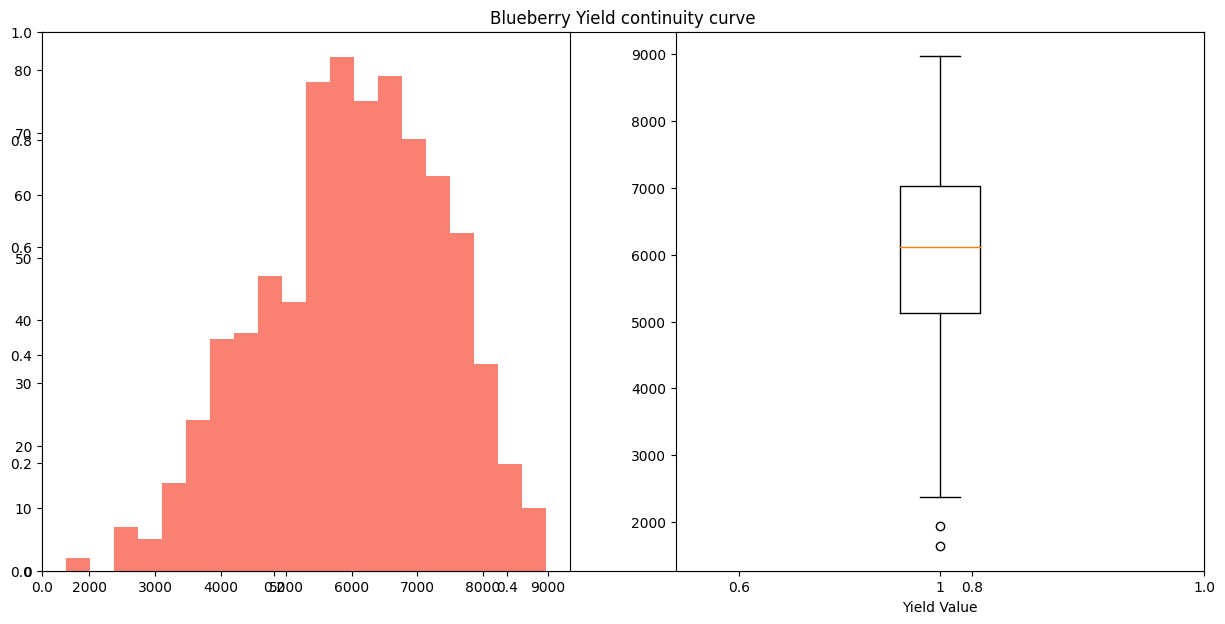

In [13]:
figs = plt.figure(figsize=(15,7))
plt.title("Blueberry Yield continuity curve")
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = df["yield"]
plt.xlabel("Yield Value")
ax1.hist(x, bins=20, color="salmon")
ax2.boxplot(x);

### KDE Plot

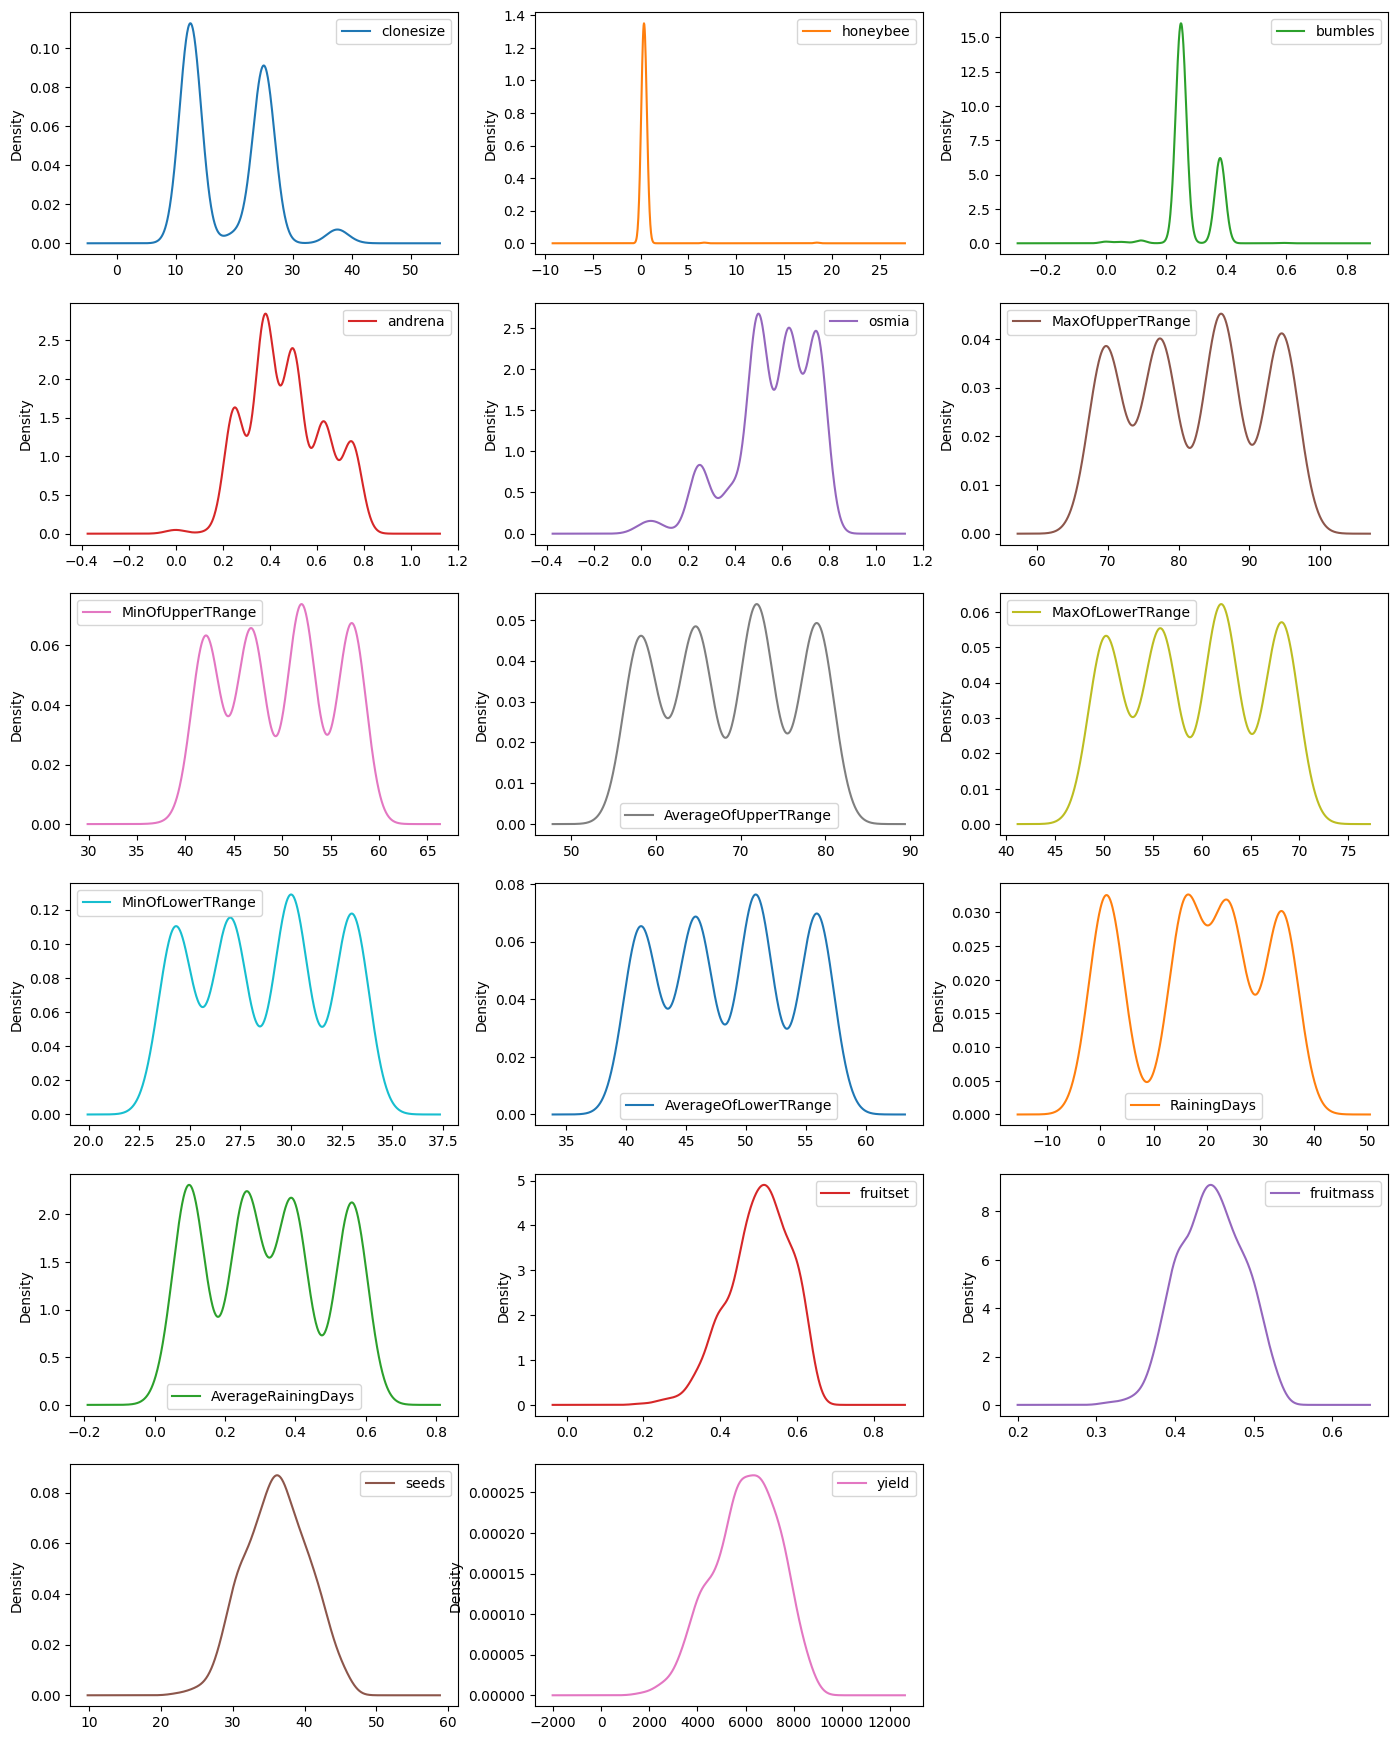

In [14]:
# unpivot = pd.melt(berry_data, berry_data.describe().columns[-1], berry_data.describe().columns[:-1])
# g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
# g.map(sns.kdeplot, "value")
# plt.show()

# ===================================================================================

# new method (one-liner)

df.plot(kind="density", 
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

# kind = density, histogram, boxplots

### Box Plot

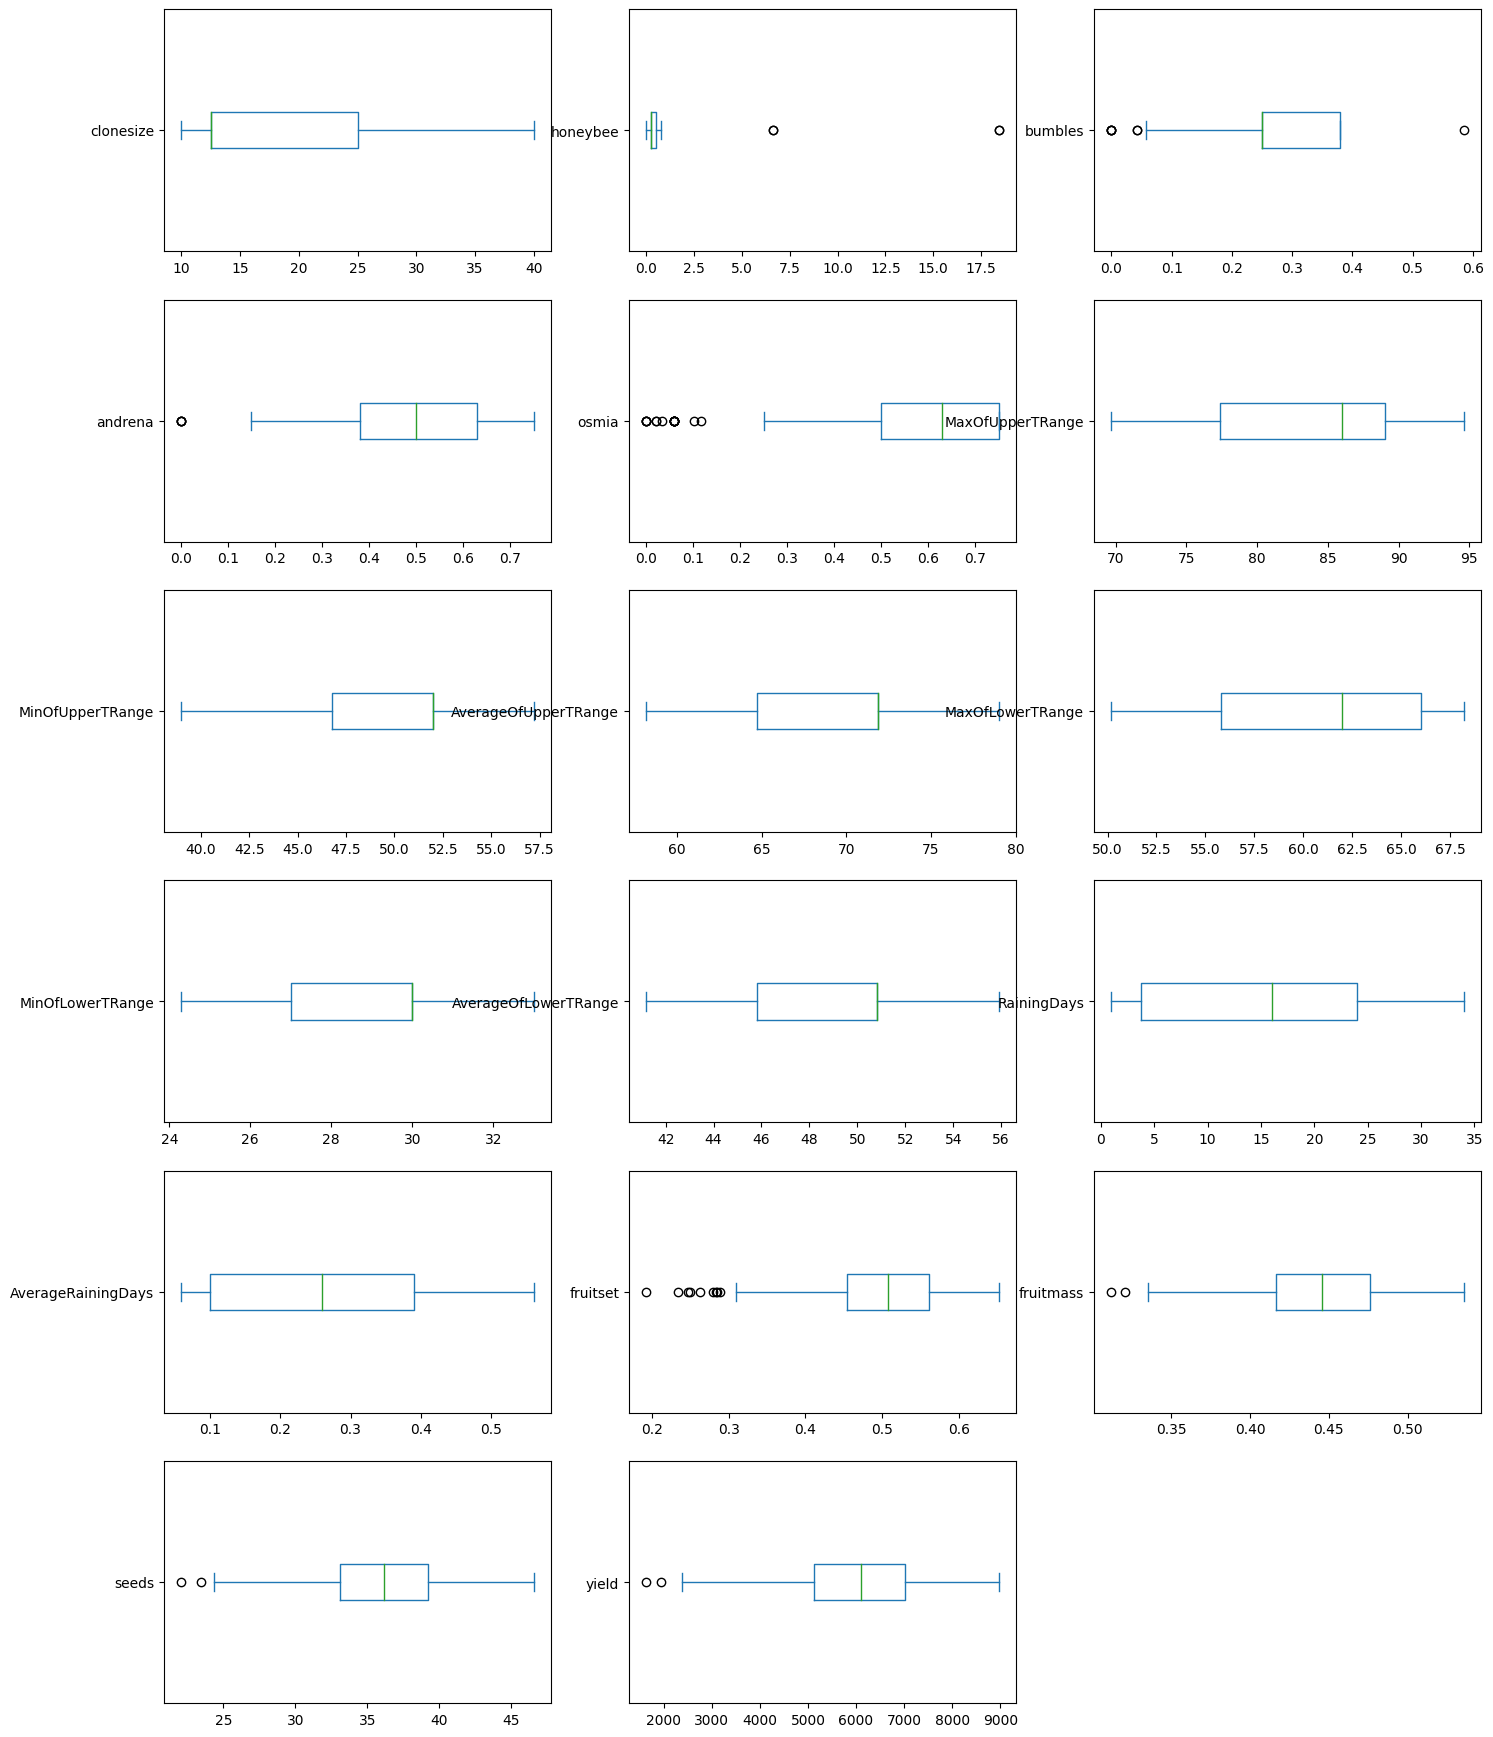

In [15]:
df.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

### MultiVariate Analysis

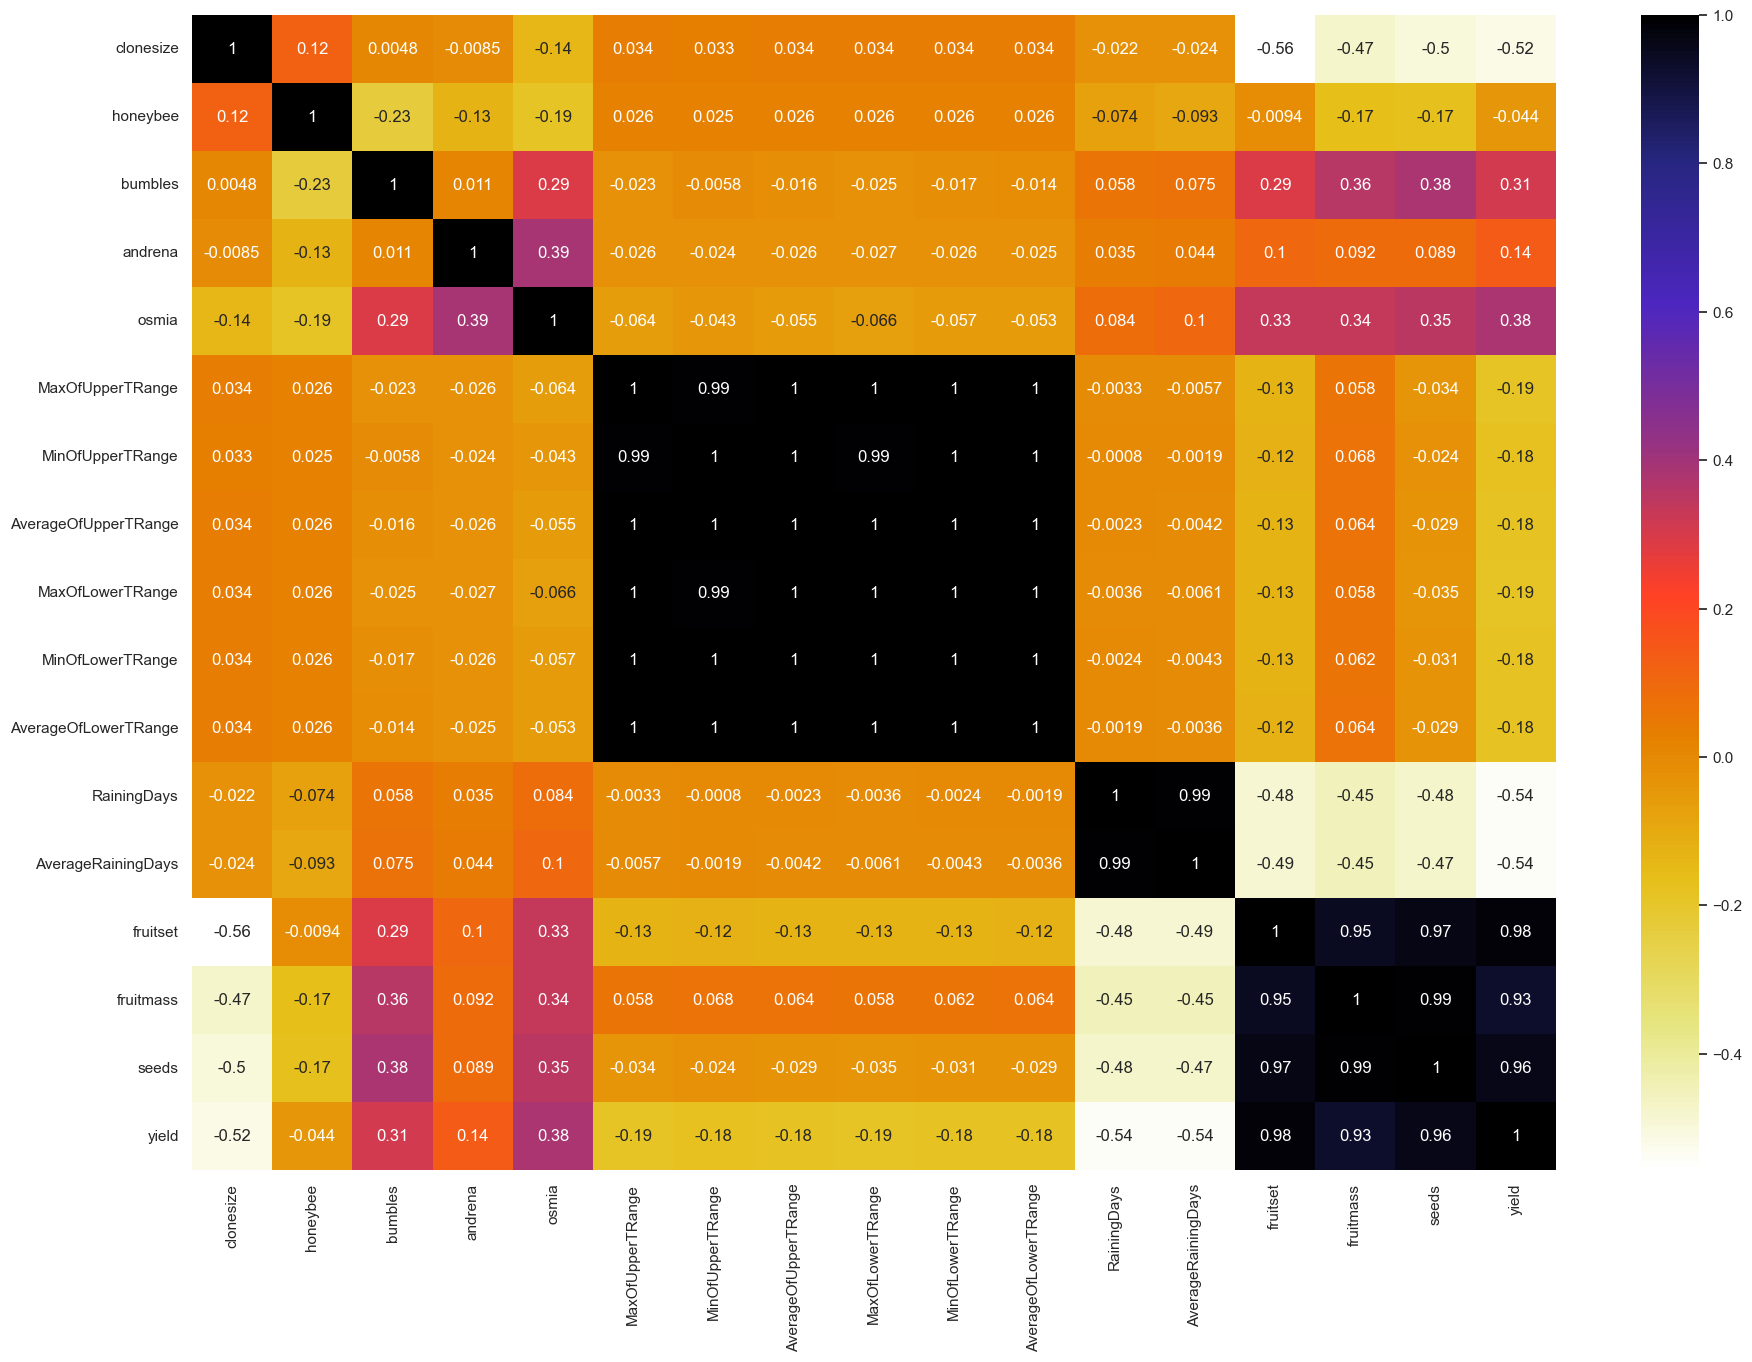

In [16]:
plt.figure(figsize=(22, 15))
sns.set()
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r);

### Preprocessing 

columns to drop:  'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee'

We cannot keep fruitmass, fruitset and seeds as well. they are the derivatives of the output and cannot be considered for training.

In [17]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [18]:
df_preprocess = df.drop(columns=['honeybee', 'MaxOfUpperTRange', 'MinOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange','fruitset', 'fruitmass', 'seeds', 'RainingDays'], axis='columns')

df_preprocess

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,3373.436842
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


In [19]:
df_processed = df_preprocess.copy()
df_processed.sample(3)

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
265,12.5,0.25,0.63,0.50,79.0,55.9,0.39,5151.386473
344,12.5,0.25,0.75,0.75,71.9,50.8,0.56,5729.569636
522,25.0,0.25,0.50,0.63,71.9,50.8,0.10,6015.224564


In [20]:
part1 = df_processed.drop(columns=['yield'])
part2 = df_processed[['yield']]

In [21]:
part1

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39
...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06


In [22]:
part2

,yield
0,3813.165795
1,4947.605663
2,3866.798965
3,4303.943030
4,3436.493543
...,...
772,5333.873335
773,3373.436842
774,4203.027624
775,4166.299735


### Calculating IQR

In [23]:
Q1 = part1.quantile(0.25)
Q3 = part1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

clonesize               12.50
bumbles                  0.13
andrena                  0.25
osmia                    0.25
AverageOfUpperTRange     7.20
AverageOfLowerTRange     5.00
AverageRainingDays       0.29
dtype: float64


In [24]:
df_data_iqr = df_processed[~((df_processed < (Q1 - 1.5 * IQR)) | (df_processed > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
df_data_iqr.shape

(759, 8)

In [26]:
df_data_iqr.sample(4)

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
257,12.5,0.25,0.50,0.75,58.2,41.2,0.39,6621.250814
290,12.5,0.25,0.63,0.63,58.2,41.2,0.56,5313.378277
7,37.5,0.25,0.25,0.25,79.0,55.9,0.56,2379.905214
468,25.0,0.25,0.38,0.50,58.2,41.2,0.10,5498.460221


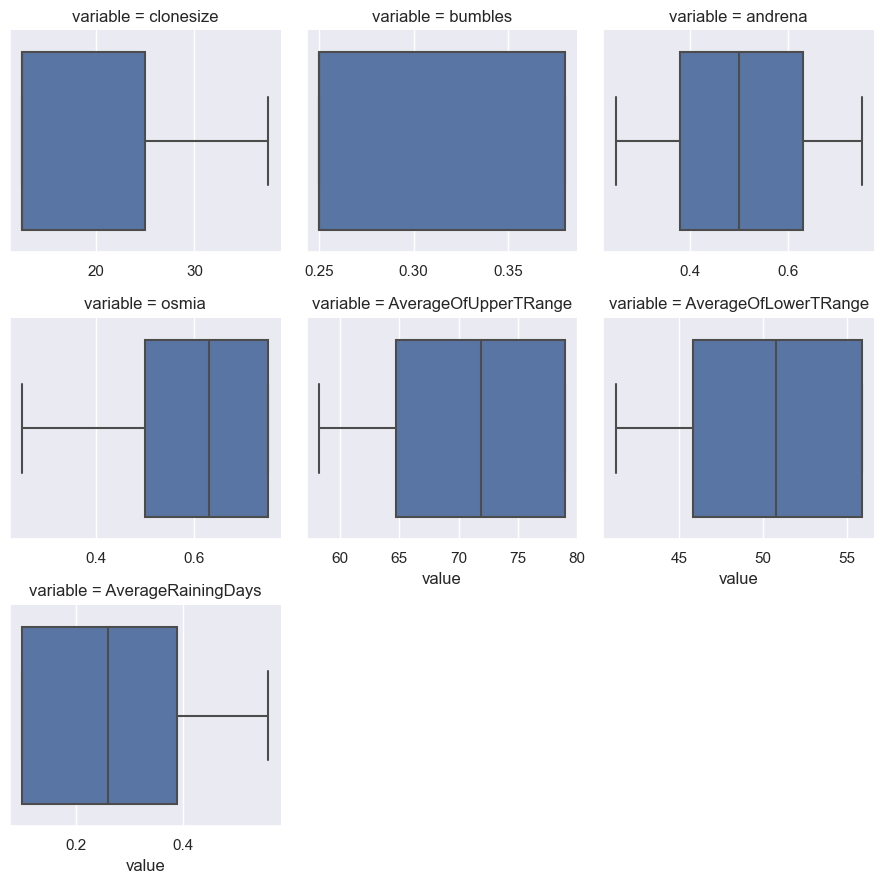

In [27]:
unpivot = pd.melt(df_data_iqr, df_data_iqr.describe().columns[-1], df_data_iqr.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show();

In [28]:
from scipy import stats

In [29]:
z = np.abs(stats.zscore(df_preprocess))
print(z)

     clonesize   bumbles   andrena     osmia  AverageOfUpperTRange  \
0     2.678126  0.488512  1.359549  1.846405              0.414096   
1     2.678126  0.488512  1.359549  1.846405              0.414096   
2     2.678126  0.488512  1.359549  1.846405              1.339534   
3     2.678126  0.488512  1.359549  1.846405              1.339534   
4     2.678126  0.488512  1.359549  1.846405              0.414096   
..         ...       ...       ...       ...                   ...   
772   1.253503  2.494523  0.371655  2.982429              0.414096   
773   3.035546  2.494523  0.371655  2.982429              0.414096   
774   0.176180  2.494523  0.371655  2.982429              0.414096   
775   0.176180  2.494523  0.371655  2.982429              0.407067   
776   0.176180  2.494523  0.371655  2.982429              0.407067   

     AverageOfLowerTRange  AverageRainingDays     yield  
0                0.403960            0.350531  1.622087  
1                0.403960            1.2852

In [30]:
df_data_zscore = df_preprocess[(z < 3).all(axis=1)]
df_data_zscore.shape

(767, 8)

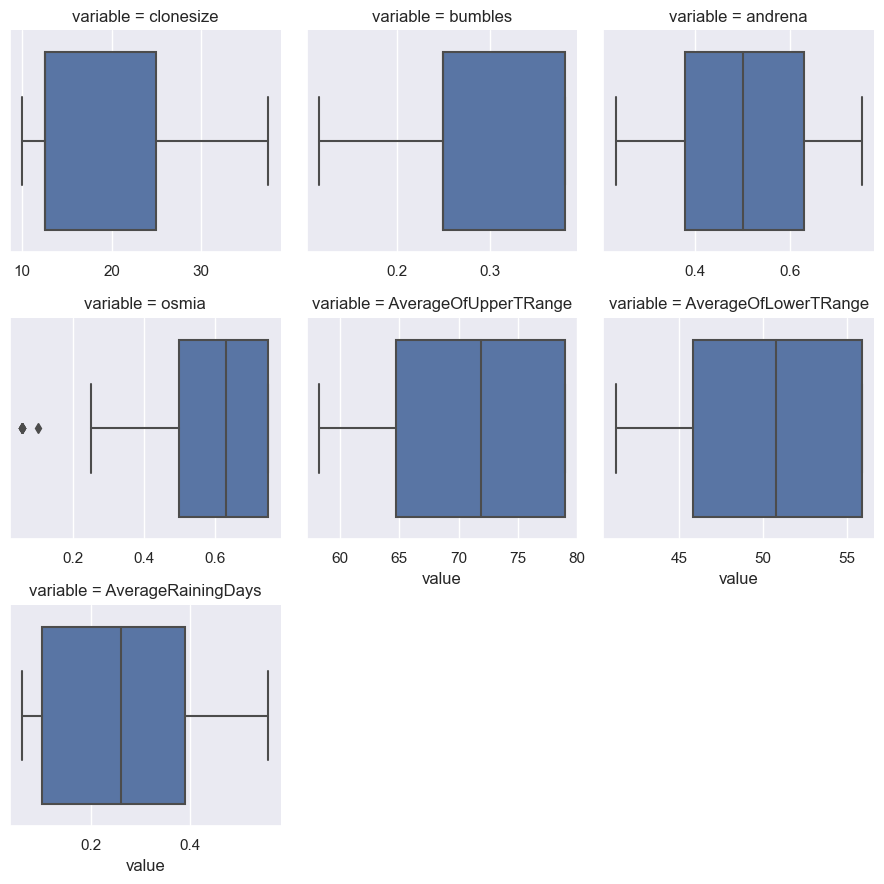

In [31]:
unpivot = pd.melt(df_data_zscore, df_data_zscore.columns[-1], df_data_zscore.columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show();

In [32]:
df_data_processed = df_data_zscore
df_data_processed.sample(3)

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
457,25.0,0.25,0.38,0.50,71.9,50.8,0.26,5946.052257
711,25.0,0.38,0.50,0.50,58.2,41.2,0.39,5739.680287
281,12.5,0.25,0.63,0.63,79.0,55.9,0.39,5446.697471


### Feature Selection

In [33]:
## feature Selection / engineering libraries

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

### Create Functions for feature selection

In [34]:
def select_features_on_corr(X_train, y_train, X_test, x='all'):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
        
    fs_corr.fit(X_train, y_train)
    
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

In [35]:
def select_features_on_infogain(X_train, y_train, X_test, x='all'):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k = x)
        
    fs_info.fit(X_train, y_train)
    
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

### Split the Data into X and y

In [36]:
df_data_processed.sample(3)

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
360,12.5,0.38,0.38,0.50,71.9,50.8,0.56,5527.425034
507,25.0,0.25,0.50,0.50,79.0,55.9,0.26,5453.993821
598,25.0,0.25,0.63,0.75,64.7,45.8,0.56,5720.723161


In [37]:
X = df_data_processed.drop(columns=['yield'], axis=1)
y = df_data_processed['yield']

In [38]:
X

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39
...,...,...,...,...,...,...,...
770,20.0,0.293,0.234,0.058,71.9,50.8,0.06
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06


In [39]:
y

0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
770    5449.421199
772    5333.873335
774    4203.027624
775    4166.299735
776    3943.131681
Name: yield, Length: 767, dtype: float64

### Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [41]:
X_train_fs, X_test_fs, fs_corr = select_features_on_corr(X_train, y_train, X_test)

X_train_fs, X_test_fs, fs_info = select_features_on_infogain(X_train, y_train, X_test)

Feature clonesize: 203.793131
Feature bumbles: 53.921042
Feature andrena: 11.008517
Feature osmia: 87.866093
Feature AverageOfUpperTRange: 25.968923
Feature AverageOfLowerTRange: 25.938061
Feature AverageRainingDays: 298.265612


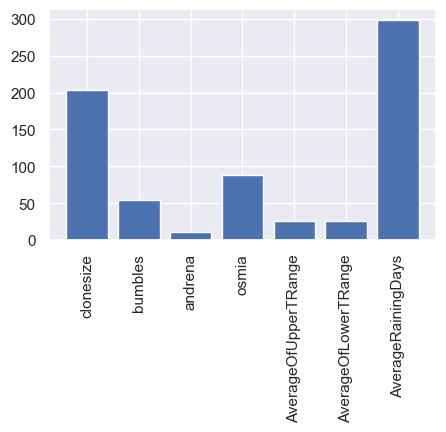

Feature clonesize: 0.191912
Feature bumbles: 0.049658
Feature andrena: 0.042815
Feature osmia: 0.088826
Feature AverageOfUpperTRange: 0.090213
Feature AverageOfLowerTRange: 0.090156
Feature AverageRainingDays: 0.245897


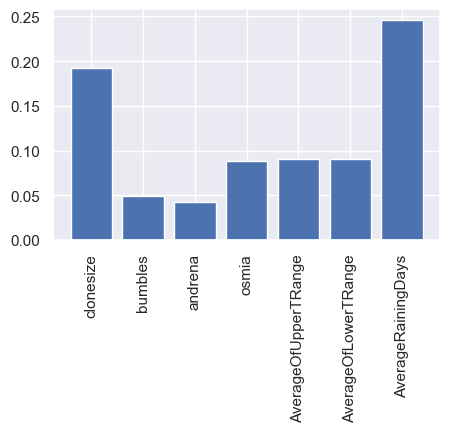

In [42]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.figure(figsize=(5,3))
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()
    
fs_score_plot(fs_corr)
fs_score_plot(fs_info)

### Model Building

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [106]:
kfolds = KFold(n_splits=10)
model = LinearRegression()
scoring = "r2"

results = cross_val_score(model, X_train_fs, y_train, cv=kfolds, scoring=scoring)
print("Results based on Linear Regression : ", results.mean())

Results based on Linear Regression :  0.8046623886679448


### Ridge Regression

In [121]:

from sklearn.linear_model import Ridge

model = Ridge()
scoring = "r2"
results = cross_val_score(model, X_train_fs, y_train, cv=kfolds, scoring=scoring)
print("Results based on Ridge Regression : ", results.mean())

Results based on Ridge Regression :  0.8011878501846086


### Lasso Regression

In [122]:
from sklearn.linear_model import Lasso

model = Lasso()
scoring = "r2"
results = cross_val_score(model, X_train_fs, y_train, cv=kfolds, scoring=scoring)
print("Results based on Lasso Regression : ", results.mean())

Results based on Lasso Regression :  0.8079227339120122


### Elastic Net Regression

In [123]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
scoring = "r2"
results = cross_val_score(model, X_train_fs, y_train, cv=kfolds, scoring=scoring)
print("Results based on ElasticNet : ", results.mean())

Results based on ElasticNet :  0.33515600192731426


### KNN

In [127]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
scoring = "r2"
results = cross_val_score(model, X_train_fs, y_train, cv=kfolds, scoring=scoring)
print("Results based on KNN : ", results.mean())

Results based on KNN :  0.9109992662649136


### Decision Tree

In [128]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
scoring = "r2"
results = cross_val_score(model, X_train_fs, y_train, cv=kfolds, scoring=scoring)
print("Results based on Decision Tree : ", results.mean())

Results based on Decision Tree :  0.9352161007894402


### Support Vector Machine

In [130]:
from sklearn.svm import SVR

model = SVR()
scoring = "r2"
results = cross_val_score(model, X_train_fs, y_train, cv=kfolds, scoring=scoring)
print("Results based on SVM : ", results.mean())

Results based on SVM :  -0.0067824773345349755


### Random Forest 

In [131]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
scoring = "r2"
results = cross_val_score(model, X_train_fs, y_train, cv=kfolds, scoring=scoring)
print("Results based on RF : ", results.mean())

Results based on RF :  0.9616562040412149


### The best performance is of Random Forest Regressor, let's fine tune it more

In [140]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_fs, y_train)
y_pred = rf_model.predict(X_test_fs)

In [141]:
print('R2 Score :' , r2_score(y_test, y_pred))

R2 Score : 0.9565305007322727


### Load the Model

In [144]:
## Load the model

loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(X_test_fs, y_test)
print(result)

0.9566106672469104


### Hyperparameter Tuning

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [173]:
# Create a based model
rf = RandomForestRegressor()

In [174]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [175]:
# Fit the grid search to the data
grid_search.fit(X_train_fs, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [176]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [177]:
best_grid = grid_search.best_estimator_

In [178]:
grid_accuracy = evaluate(best_grid, X_test_fs, y_test)

Model Performance
Average Error: 203.4246 degrees.
Accuracy = 96.42%.


### Fit the model with new params

In [187]:
best_grid.fit(X_train_fs, y_train)

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300)

In [188]:
accuracy = evaluate(best_grid, X_test_fs, y_test)

Model Performance
Average Error: 203.4246 degrees.
Accuracy = 96.42%.


### Save the Model

In [196]:
filename = 'rf_model.sav'
joblib.dump(best_grid, open(filename, 'wb'), compress=7)

### Load the Model

In [197]:
loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(X_test_fs, y_test)
print(result)

0.9361694908585064


### Modelling Pipeline

In [198]:
from sklearn.pipeline import Pipeline

In [199]:
## Create Pipeline

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('RF', RandomForestRegressor()))

model = Pipeline(estimators)

In [200]:
## Evaluate Pipeline

kfold = KFold(n_splits=10)
results = cross_val_score(best_grid, X_train_fs, y_train, cv=kfold)
print(results.mean())

0.9371425821226189


In [194]:
## Evaluate Pipeline

kfold = KFold(n_splits=10)
results = cross_val_score(best_grid, X_train_fs, y_train, cv=kfold)
print(results.mean())

0.9384460905748192


### Model Explainability (Explainable AI)

we have two models `rf_model` and `best_grid` which is random forest and xgboost trained on the test set. we will visualize the model behavior and explainability.

[Shap Tree Explainer](https://shap.readthedocs.io/en/stable/example_notebooks/tabular_examples/tree_based_models/Fitting%20a%20Linear%20Simulation%20with%20XGBoost.html) has the code docs

In [203]:
#pip install shap >=0.38.0 --user

In [204]:
import shap
shap.initjs()